# Jobsheet 02 - Regression

Isikan identitas berikut
NIM:
Nama:
Kelas:

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [55]:
# import package
import numpy as np
import pandas as pd

In [56]:
# baca data
data = pd.read_csv('pakistan_population.csv')
data.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Pakistan Global Rank
0,2020,220892340,2.00,4327022,-233379,22.8,3.55,287,35.1,77437729,2.83,7794798739,5
1,2019,216565318,2.04,4337032,-233379,22.0,3.73,281,34.9,75510639,2.81,7713468100,5
2,2018,212228286,2.08,4322077,-233379,22.0,3.73,275,34.7,73630430,2.78,7631091040,5
3,2017,207906209,2.10,4274856,-233379,22.0,3.73,270,34.5,71795700,2.75,7547858925,5
4,2016,203631353,2.11,4204389,-233379,22.0,3.73,264,34.4,70005271,2.73,7464022049,6


In [57]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          18 non-null     int64  
 1   Population                    18 non-null     int64  
 2   Yearly % Change               18 non-null     float64
 3   Yearly Change                 18 non-null     int64  
 4   Migrants (net)                18 non-null     int64  
 5   Median Age                    18 non-null     float64
 6   Fertility Rate                18 non-null     float64
 7   Density (P/Km²)               18 non-null     int64  
 8   Urban Pop %                   18 non-null     float64
 9   Urban Population              18 non-null     int64  
 10  Country's Share of World Pop  18 non-null     float64
 11  World Population              18 non-null     int64  
 12  Pakistan Global Rank          18 non-null     int64  
dtypes: floa

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Pakistan Global Rank
count,18.000000,1.800000e+01,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,18.000000,1.800000e+01,18.000000
mean,1994.166667,1.336526e+08,2.455000,2.991239e+06,-74703.277778,20.205556,5.266667,173.500000,30.105556,4.317472e+07,2.190556,5.694506e+09,8.166667
std,22.350813,6.748246e+07,0.497266,1.308291e+06,151358.896504,1.532193,1.322155,87.586764,4.908513,2.579417e+07,0.527530,1.786229e+09,3.185445
min,1955.000000,4.048803e+07,1.520000,5.891310e+05,-233379.000000,18.400000,3.550000,53.000000,19.700000,7.968418e+06,1.460000,2.773020e+09,5.000000
25%,1976.250000,6.962624e+07,2.102500,1.863096e+06,-228992.500000,18.650000,3.742500,90.500000,26.750000,1.867222e+07,1.667500,4.174111e+09,6.000000
50%,1997.500000,1.330602e+08,2.345000,3.408935e+06,-54978.500000,20.000000,5.665000,173.000000,31.850000,4.239575e+07,2.235000,5.943853e+09,7.500000
75%,2015.750000,2.025803e+08,2.827500,4.153408e+06,-2073.250000,21.950000,6.600000,262.750000,34.350000,6.956065e+07,2.722500,7.442966e+09,10.000000
max,2020.000000,2.208923e+08,3.390000,4.337032e+06,277424.000000,22.800000,6.600000,287.000000,35.100000,7.743773e+07,2.830000,7.794799e+09,14.000000


### Visualisasi Data

In [58]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


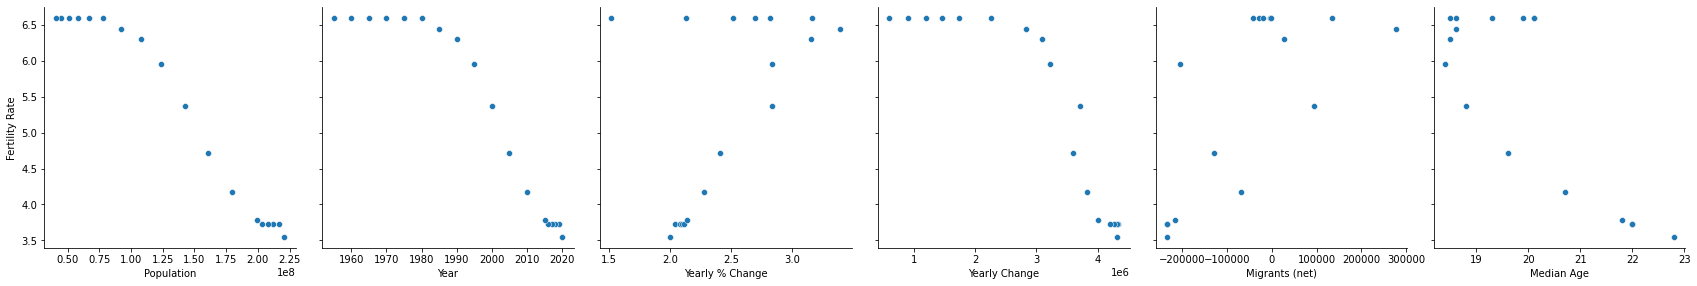

In [59]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Population','Year', 'Yearly % Change','Yearly Change','Migrants (net)','Median Age'], 
             y_vars='Fertility Rate', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

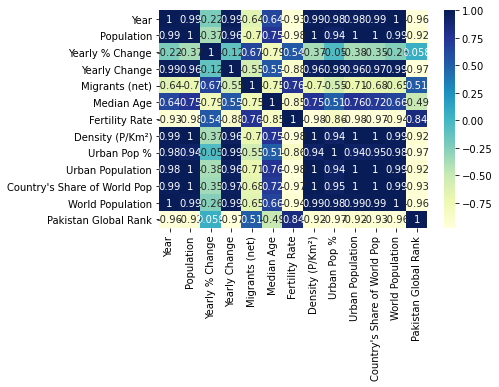

In [60]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [61]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Population']
y = data['Fertility Rate']

In [62]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [63]:
# hasil training dtaset
X_train
y_train

6     4.17
17    6.60
12    6.60
5     3.78
2     3.73
4     3.73
10    6.30
0     3.55
15    6.60
7     4.71
3     3.73
8     5.37
Name: Fertility Rate, dtype: float64

In [64]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [65]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const         7.816220e+00
Population   -1.936744e-08
dtype: float64

In [66]:
# analisis statistika dari garis regresi
lr.summary()

c:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fertility Rate   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     213.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           4.46e-08
Time:                        16:34:56   Log-Likelihood:                -1.0061
No. Observations:                  12   AIC:                             6.012
Df Residuals:                      10   BIC:                             6.982
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8162      0.216     36.238      0.000       7.336       8.297
Population -1.937e-08   1.32e-09    -14.625      0.000   -2.23e-08   -1.64e-08
==============================================================================
Omnibus:                        1.590   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                0.764
Skew:                           0.610   Prob(JB):                        0.682
Kurtosis:                       2.805   Cond. No.                     4.22e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

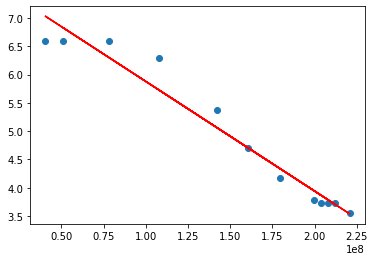

In [67]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.8162 + -1.937e-08*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [68]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


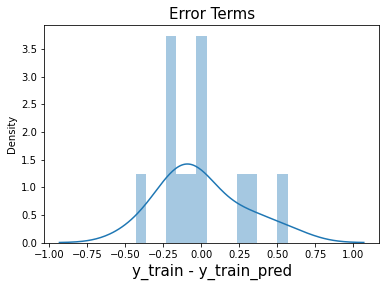

In [69]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

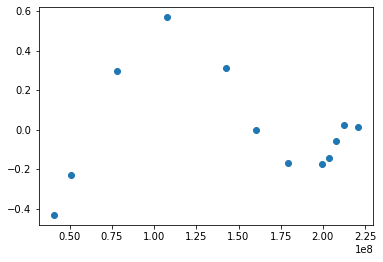

In [70]:
plt.scatter(X_train,res)
plt.show()

In [71]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

9     5.418979
11    6.030706
16    6.944904
13    6.522148
1     3.621904
dtype: float64

In [72]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9058611061543146

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

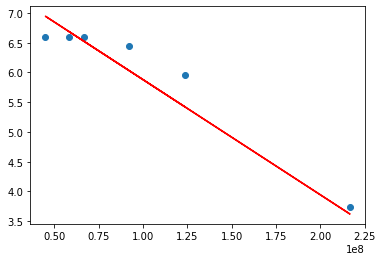

In [73]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [74]:
xbaru = data[['Population', 'World Population']]
ybaru = data['Fertility Rate']

In [75]:
xConst = sm.add_constant(xbaru)

In [76]:
model = sm.OLS(ybaru, xConst).fit()
predictions = model.predict(xConst)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Fertility Rate   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     609.2
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           4.34e-15
Time:                        16:36:09   Log-Likelihood:                 9.6317
No. Observations:                  18   AIC:                            -13.26
Df Residuals:                      15   BIC:                            -10.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4319      0.373  

c:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
